# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/666.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>

---

# <center>Milestone 3 : Table of content</center>

0. **Imports, initialisations**

1. **Recall of certain methods from Milestone 2**
   - 1.1. Data preprocessing
   - 1.2. Construction of a new funny metric
   - 1.3. Gathering of other datasets
   - 1.4. Tokenisation and lemmatisation of data
   - 1.5. Descriptive statistic tasks
   - 1.6. Building usefull metrics


2. **Narrative Flow**
   - 2.1. **Axis 1 – What Is Considered Funny**
   - 2.2. **Axis 2 – How professions are laughed about**
   - 2.3. **Axis 3 – Gender Roles and stereotypes**

## 0. Imports, initialisations

In case an import cannot be imported run this:

In [1]:
import importlib
import src.utils.paths as p
importlib.reload(p)

<module 'src.utils.paths' from 'c:\\Users\\cyrie\\OneDrive\\Documents\\EPFL\\2025_MA_1\\ADA\\ada-2025-project-adacore42\\src\\utils\\paths.py'>

Getting the project root directory path.

In [2]:
from pathlib import Path
import sys
import os

try:
    root = Path(__file__).resolve().parent
except NameError:
    root = Path.cwd()  # fallback for Jupyter notebooks

while root.parent != root:
    if any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
        break
    root = root.parent

# Fallback in case nothing found
if not any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
    print("Could not locate project root — defaulting to current working directory")
    root = Path.cwd()

print(f"Root folder detected at: {root}")

# Ensure importability of the project
if str(root) not in sys.path:
    sys.path.insert(0, str(root))


from src.utils.paths import STORED_DATAPREP_PKL_PATH, STORED_PLOTSGUI_PKL_PATH, DATA_PREPARATION_PY_PATH, STORED_DATAPREPNOUNS_PKL_PATH, STORED_DATAPREPTOKENS_PKL_PATH, OCCUPATIONS_CSV_PATH
print(DATA_PREPARATION_PY_PATH.resolve()) #If works: ...../ADAcore42/src/data/DataPreparation.py

Root folder detected at: c:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42
C:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42\src\data\DataPreparation.py


In [3]:
import pandas as pd
import pickle
import json
import ast
from collections import Counter

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, Markdown

# data processing
#from src.data.tokenise import load_data, apply_preprocessing, save_data
#from src.data.extract_nouns import load_data, apply_noun_extraction, save_noun_data

# utils
from src.utils.general_utils import *
#from src.utils.gui import plots_gui as pg
from src.utils.function_axis_1 import plot_global_vote_distribution
from src.utils.function_axis_1 import compute_funny_ranking


# scripts
import src.scripts.descriptive_stats_tasks as dst
from src.scripts.axis2 import *

# models
from src.models.gender_analysis import GenderAnalysis
from src.models.similarity_analysis import SimilarityModel, CaptionClustering, SimilarHumorAnalysis
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

%matplotlib inline

c:\Users\cyrie\anaconda3\envs\ada\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Recall of certain methods from Milestone 2

##### See the results from Milestone 2 [here](results_MS2.ipynb)

### 1.1. Data preprocessing
Cleaning and preprocessing of the dataset : [*The main preprocessing is done by this file*](src/data/DataPreparation.py)


### 1.2. Construction of a New Funny Metric
To better identify which captions are truly funny, we designed a new *funny metric* that combines both the **proportion of votes** and the **popularity (number of votes)** of each caption.

*écrire la démarche de la nouvelle metric ?*


### 1.3. Gathering of other datasets
**Temporal dataset augmentation** : The following webpage has dates of some of the contests. We add it to the **dataC** table as a new column:
"https://nextml.github.io/caption-contest-data/"


**Occupations dataset :** Five datasets of varying size and specificity were loaded. In total, these add up to around 33,000 occupations.
 - [**O*NET**](https://www.onetonline.org/find/all)  
 - [**ESCO (ESCO dataset v1.2.0)**](https://esco.ec.europa.eu/en/use-esco/download)   
 - [**Kaggle Job Description Dataset**](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset)  
 - [**US Labor Statistics (May 2024, all data)** ](https://www.bls.gov/oes/tables.htm)   
 - [**US Census Data (2018 Census Occupation Index)**](https://www.census.gov/topics/employment/industry-occupation/guidance/indexes.html)

This code is not included in the results. This is because it requires conflicting package versions. The code can be seen [here](src\scripts\occupations.ipynb), but it should not be run as the files it is reading from do not exist in the given folder. In any case, it does not have output, and the prouced file is available to all in the data folder.

**Gender dataset :** *Dictionary of gendered words*: This dictionary was constructed based on Danielle Sucher's "Jailbreak the Patriarchy" (https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)

### Executing the DataPreparation.ipynb file

This cell executes all what's been described in section 1.1. We did not want to copy paste the code here to keep this result file clean, but for any verification about the code, please refer to ```src\data\DataPreparation.py```.


In [ ]:
#%run {DATA_PREPARATION_PY_PATH.resolve()}

# Est ce que le .py s'est bien mis à jour quand on a modifié le .ipynb ?? car la nouvelle metric funny_score_scaled n'apparait pas

In [4]:
# Pickle datapreprocessed file loading
with open(STORED_DATAPREP_PKL_PATH, "rb") as f:
    data = pickle.load(f)

# Objects extraction
dataA = data['dataA']
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']

### 1.4. Tokenisation and lemmatisation of data

*.......*


### 1.5. Descriptive statistic tasks

*See code and results from Milestone 2, those statistics were used to build our methods for milestone 3 (skewed distribution of votes and mean funny_score, most cited locations in the cartoons, types of questions W-words...)*


### 1.6. Building usefull metrics

***To access to the definitions and content of classes SimilarityModel,***\
***CaptionClustering, SimilarHumorAnalysis, please see : [here](src\models\similarity_analysis.py)***

# 2. Narrative Flow

## 2.1. Axis 1 – What Is Considered Funny

### 2.1.1 : Katia's wonderful work

...

### 2.1.2. Dominic's extraordinary work

...

### 2.1.3 : Are there any topics to best create funniness and win the contest ?

Now that we have tried to analyse what elements makes a joke funnier, we will dive into caption-topics clustering, to try to see if there is some topics better than other, some that creates more fun.\
We will firstly build the pipeline analysing captions among one contest, and then generalize and perform statistical analysis to finally conclude about this question.

Contest number 801, published May 23, 2022 :
<center>
    <img src="data/newyorker_caption_contest_virgin/images/801.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>


*Top Rated caption* : “What do you mean I don’t have time for another game?”\
*The New Yorker's winner* : “I thought you’d be better at the endgame.”\
*Number of votes* : 562,261

We first tried to find clusters of topics using Kmeans, DBSCAN, agglomerative, and spectral clustering methods, varying the number of cluster (hyperparameter) (see the benchmark that was done [*here*](_Other/cycy_analysis/cycy_results_MS3.ipynb)). But the corresponding silouhette score calculated was really not satisfying. We then used the pretrained BERTtopic model [SOURCE] and here are the results.

In [5]:
import src.models.topic_clustering_analysis as topic_clustering

importlib.reload(topic_clustering)
from src.models.topic_clustering_analysis import CaptionTopicClusterer

#### Identify common topics among all captions
HDBSCAN clustering algorithm and BERTtopic embedding

Finding the good minimum number of elements per topics:

In [ ]:
"""contest_idx = 289
data_m = dataA[contest_idx].copy()
captions = data_m["caption"].tolist()

fit_topic_test = []
results_test = []

for ms in [5, 10, 15, 20, 30, 40, 50]: 
    clusterer_test = CaptionTopicClusterer(fun_metric="funny_score_scaled", min_topic_size=ms, verbose=False)
    fit_res_test = clusterer_test.fit_transform(captions)
    eval_res_test = clusterer_test.evaluate_fit_transform(fit_res_test)
    fit_topic_test.append(fit_res_test)
    results_test.append(eval_res_test)

df_eval_test = pd.DataFrame(results_test)
print(df_eval_test.sort_values("coherence", ascending=False))

#saving for later
df_eval_test.to_csv("df_eval_test_contest_289.csv", index=False)
#loading for later : df_eval_test = pd.read_csv("df_eval_test_contest_289.csv")




#saving for later
with open("fit_topic_test_contest_289.pkl", "wb") as f:
    pickle.dump(
        {
            "contest_idx": contest_idx,
            "min_topic_sizes": [5, 10, 15, 20, 30, 40, 50],
            "fit_topic_test": fit_topic_test
        }, f)


#loading for later : 
#with open("fit_topic_test_contest_289.pkl", "rb") as f:
#    data = pickle.load(f)
#fit_topic_test = data["fit_topic_test"]
"""

Batches: 100%|██████████| 140/140 [00:29<00:00,  4.76it/s]


   min_topic_size  coherence  diversity  silhouette  outlier_rate  n_topics
4              30   0.491269   0.717172    0.078908      0.252184        37
0               5   0.485574   0.778234    0.063743      0.203135       140
3              20   0.484465   0.772908    0.066406      0.211646        50
5              40   0.484154   0.693252    0.083859      0.310190        27
6              50   0.467684   0.626016    0.064135      0.279955        19
2              15   0.458247   0.788530    0.066282      0.197760        60
1              10   0.450298   0.782353    0.069030      0.172452        81


Fait le 12/12:
   min_topic_size  coherence  diversity  silhouette  outlier_rate  n_topics
0               5   0.482593   0.779592    0.063452      0.210302       152
1               8   0.470699   0.782828    0.066601      0.223740       102
2              10   0.449194   0.752161    0.062025      0.196641        85
3              15   0.446302   0.796491    0.059996      0.171557        58

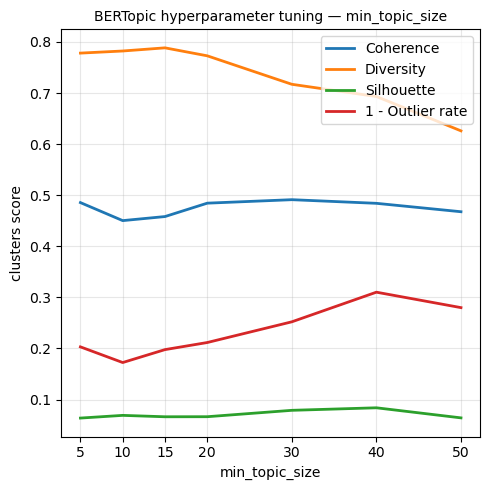

In [ ]:
"""x = df_eval_test["min_topic_size"]

plt.figure(figsize=(5,5))
plt.plot(x, df_eval_test["coherence"].values, linewidth=2, label="Coherence")
plt.plot(x, df_eval_test["diversity"].values, linewidth=2, label="Diversity")
plt.plot(x, df_eval_test["silhouette"].values, linewidth=2, label="Silhouette")
plt.plot(x, df_eval_test["outlier_rate"].values, linewidth=2, label="1 - Outlier rate")
plt.title("BERTopic hyperparameter tuning — min_topic_size", fontsize=10)
plt.xlabel("min_topic_size")
plt.ylabel("clusters score")
plt.xticks(x)
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()"""

| Indicateur   | Bon signe                      | Mauvais signe            |
| ------------ | ------------------------------ | ------------------------ |
| coherence    | ↑ jusqu’à un plateau           | chute brutale            |
| diversity    | 0.6–0.9                        | trop proche de 1 (bruit) |
| silhouette   | > 0.05 (souvent faible en NLP) | ≈ 0                      |
| outlier_rate | < 25–30 %                      | > 50 %                   |
| n_topics     | stable                         | explosion ou collapse    |


🎯 Le meilleur min_topic_size = celui juste avant : la chute de coherence, la hausse massive des outliers

👉 Pour les captions humoristiques : embeddings très dispersés, beaucoup de quasi-singles --> silhouette naturellement faible\
 --> Donne plus de poids à la coherence + inspection humaine qu’au silhouette.

Once we found it, do the actual topic clustering

In [6]:
contest_idx = 289
data_m = dataA[contest_idx].copy()
captions = data_m["caption"].tolist()

clusterer = CaptionTopicClusterer(fun_metric="funny_score_scaled", min_topic_size=30, verbose=False)  #can also use as fun_metric : funny_score_scaled

# Clusterize topics (do it only once, then save the results)
"""fit_topic = clusterer.fit_transform(captions)

with open("fit_topic_mints=30_contest_289.pkl", "wb") as f:
    pickle.dump(
        {
            "contest_idx": contest_idx,
            "min_topic_sizes": 30,
            "fit_topic": fit_topic
        }, f)

df_topic_info = fit_topic["df_topic_info"]
#df_topics.to_csv(os.path.join("_Other", "cycy_analysis", f"caption_labeled_topics_{contest_idx}.csv"), index=False)
df_topic_info.to_csv(os.path.join(f"info_topics_{contest_idx}.csv"), index=False)"""

'fit_topic = clusterer.fit_transform(captions)\n\nwith open("fit_topic_mints=30_contest_289.pkl", "wb") as f:\n    pickle.dump(\n        {\n            "contest_idx": contest_idx,\n            "min_topic_sizes": 30,\n            "fit_topic": fit_topic\n        }, f)\n\ndf_topic_info = fit_topic["df_topic_info"]\n#df_topics.to_csv(os.path.join("_Other", "cycy_analysis", f"caption_labeled_topics_{contest_idx}.csv"), index=False)\ndf_topic_info.to_csv(os.path.join(f"info_topics_{contest_idx}.csv"), index=False)'

In [7]:
with open("fit_topic_mints=30_contest_289.pkl", "rb") as f:
    data = pickle.load(f)

fit_res = data["fit_topic"]
data_m["topic_nb"] = fit_res["topics"]
df_topic_info = fit_res["df_topic_info"]

# Aggregate clusters into less topics
agg_info = clusterer.compute_aggregated_topic_info(df_topic_info, clusterer.agg_topic_289)

# Calcule mean score of all captions by aggregated topic
df_scores = clusterer.compute_topic_scores(data_m, clusterer.agg_topic_289)

#### Assessing clustering quality:

In [8]:
# calculer la variance par topic
df_var = clusterer.compute_variance_stats(data_m)
#display(df_var)

kw_res= clusterer.kruskal_test(data_m)
print(f"Kruskal-Wallis test (H, p): {kw_res["H"]:0.2f}, pval = {kw_res["p"]:0.4f}")

pairwise_res = clusterer.pairwise_mannwhitney(data_m)
display(pairwise_res)


Kruskal-Wallis test (H, p): 50.71, pval = 0.0000


,group1,group2,U,p_raw,p_adj_bonf
19,bureaucracy_taxes_insurance,pop_culture,28878.5,2.845545e-07,0.000019
12,bureaucracy_taxes_insurance,chess_life_game,25531.0,3.350562e-07,0.000022
18,bureaucracy_taxes_insurance,misc,83330.5,1.004838e-05,0.000663
11,bureaucracy_taxes_insurance,checkmate_win_lose,81452.0,1.490837e-05,0.000984
65,pop_culture,time_endgame_clock,26392.5,5.051445e-05,0.003334
...,...,...,...,...,...
61,emotional_reactions,pop_culture,9393.0,3.176157e-02,1.000000
2,body_parts,chess_life_game,26228.0,2.307334e-01,1.000000
1,body_parts,checkmate_win_lose,81140.5,6.399926e-01,1.000000
63,misc,pop_culture,216681.5,3.054015e-02,1.000000


p-value (=probabilité d’observer ces différences par hasard)
p-value = 0.0107 < 0.05 → résultat statistiquement significatif

On rejette l’hypothèse nulle (H0:égalité des médianes) donc il existe au moins un topic dont la distribution de la métrique est différente des autres.

Un test de Kruskal-Wallis indique une différence statistiquement significative entre les thèmes agrégés (H = 26.02, p = 0.0107). Cela suggère que la métrique analysée varie selon le topic, certaines catégories présentant des médianes plus élevées que d’autres.



Mann-Whitney U (a.k.a. Wilcoxon rank-sum) : comparaison (non paramétrique) entre deux groupes, teste si les distributions (ou médianes) sont différentes.

- group1 / group2 : Les deux topics comparés
- p_raw : p-value avant correction
- p_adj_bonf : p-value après correction Bonferroni

________________

🔹 Kruskal-Wallis était significatif
p = 0.0107


Mais…

🔹 Les tests pairwise ne le sont plus

👉 Ce n’est pas une contradiction, c’est classique :

Kruskal-Wallis detecte une différence globale quelque part\
Mann-Whitney + Bonferroni detectent des différences nettes et robustes entre paires précises

💡 Bonferroni est très sévère, surtout avec beaucoup de topics :
si tu as 13 topics → 78 comparaisons
seuil effectif ≈ 0.05 / 78 ≈ 0.00064
👉 Aucune de tes p-values brutes ne descend aussi bas.

_______________

Conclusion : Bien que le test global de Kruskal-Wallis indique une différence significative entre les topics, les comparaisons pair-à-pair avec correction de Bonferroni ne révèlent aucune différence statistiquement significative. Cela suggère que les effets observés sont faibles et répartis entre plusieurs catégories plutôt que portés par une opposition nette entre deux topics spécifiques.

#### Comparing funny score of all topics

In [9]:
topic_crowd = data_m.loc[data_m["caption"] == "What do you mean I don’t have time for another game?", "aggregated_topic"].iloc[0]
topic_tny = data_m.loc[data_m["caption"] == "I thought you'd be better at the endgame.", "aggregated_topic"].iloc[0]

# Boxplot (funny score distribution within each topic)
clusterer.plot_topic_scores2(data_m, df_scores, save=r"_Other\cycy_analysis\saved_plots\boxplot_topics_289.html")

In [10]:
clusterer.plot_topic_scores2_with_winners(data_m, df_scores,
                                caption_crowd="What do you mean I don’t have time for another game?",
                                caption_tny="I thought you'd be better at the endgame.",
                                save=r"_Other\cycy_analysis\saved_plots\boxplot_topics_with_winners_289.html")

Caption TNY trouvée : True
Caption Crowd trouvée : True


#### Long-tail distribution bias:
Those boxplots per topic allow us to see the distributions of caption scores within each topic.

But if each cluster contains many mediocre captions and a few exellent ones, the average will flatten everything, resulting in a very low average score per topic. Therefore, we need to look beyond the average. We can :

1) We isolates the top X% and the average range (40–60) and compare whether certain topics are over-represented in the top rankings versus the average. To do this, we calculate the 'enrichment per topic' (=top proportion vs. overall proportion). This allows us to answer the question "Which topics produce the most excellent captions?" without using the average.

2) Instead of looking at "which topic is the funniest on average", we look at: "which topics produce the most excellent captions?" by calculating the success rate (defined a score above the average score : 1.5/3 for the mean score, 50/100 for the funny_score_scaled) rather than the average score.

In [11]:
### 1. Calcule un score d’enrichissement pour voir quels topics sont sur-représentés dans le top
df_top, df_mid, enrichment = clusterer.stratify_percentiles_and_compare(data_m, top_pct=10, middle_pct=(40,60))
clusterer.plot_bubble_enrichment(enrichment, save=r"_Other\cycy_analysis\saved_plots\enrichment_289.html")


### 2. Barplot with the proportion of captions above a certain score (the average score) for all topics
clusterer.plot_proportion_above_threshold(data_m, threshold=30, save=r"_Other\cycy_analysis\saved_plots\prop_above_thresh_289.html")
# Colorer le graph ci-dessus en fonction de quel topic contient les captions gagnante selon TNY ou selon le rank du crowd sourcing
clusterer.plot_proportion_above_threshold_with_winners(data_m, topic_crowd, topic_tny, threshold=30, save=r"_Other\cycy_analysis\saved_plots\prop_above_thresh_with_winners_289.html")

--> Est-ce que le topic gagnant est aussi celui qui surperforme globalement ?

# d'autres trucs que j'aurai pas le temps de finir:

Top 10% captions: 32, Bottom: 275
                 word       chi2         p
2753      that coming  21.882328  0.000003
2505  see that coming  16.489893  0.000049
529            coming  14.525719  0.000138
2755  that coming did  11.771564  0.000601
873               for   9.805692  0.001740
...               ...        ...       ...
41          again the   0.000000  1.000000
42    again the queen   0.000000  1.000000
43            against   0.000000  1.000000
44      against moron   0.000000  1.000000
3204     was our deal   0.000000  1.000000

[3662 rows x 3 columns]


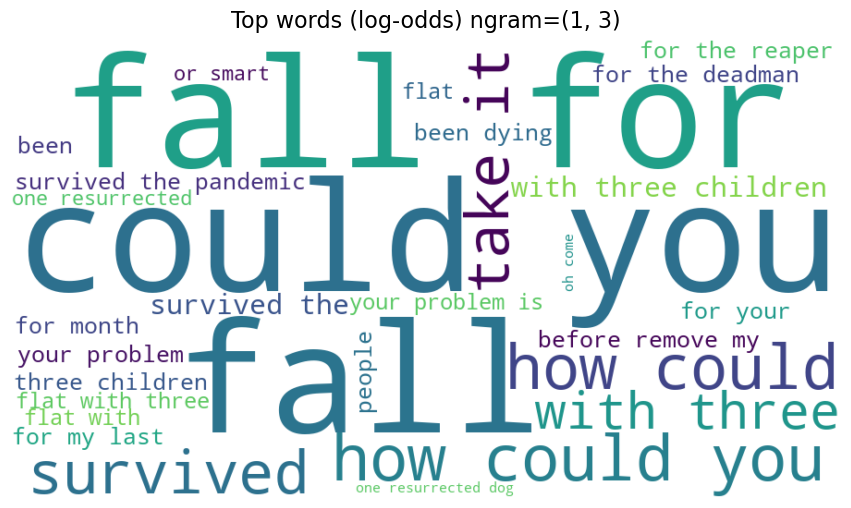

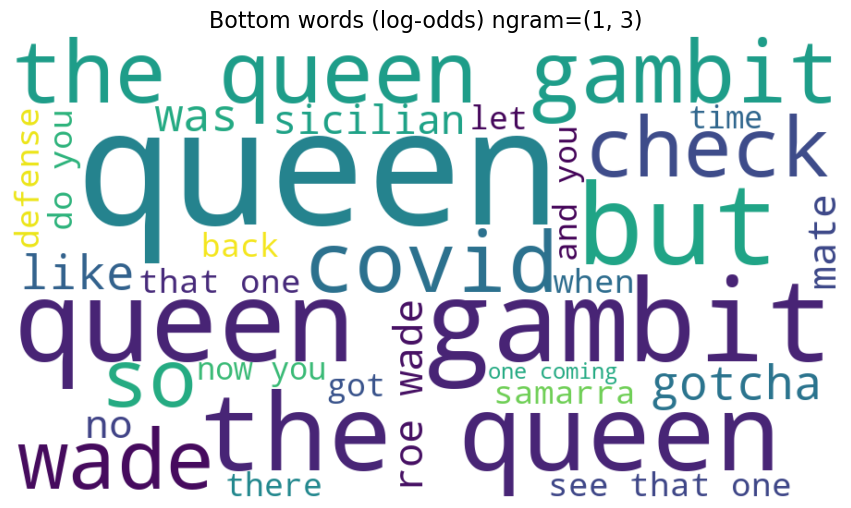

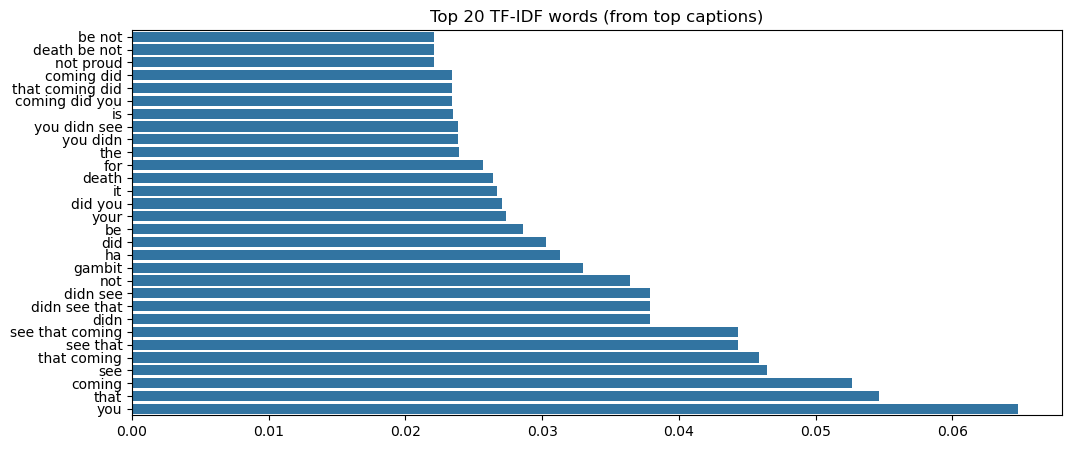

Batches: 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]


Mean sim (top): 0.4932828
Mean sim (bottom): 0.38695562
T-test similarity: 5.445783481298774, p=1.0629158424095097e-07


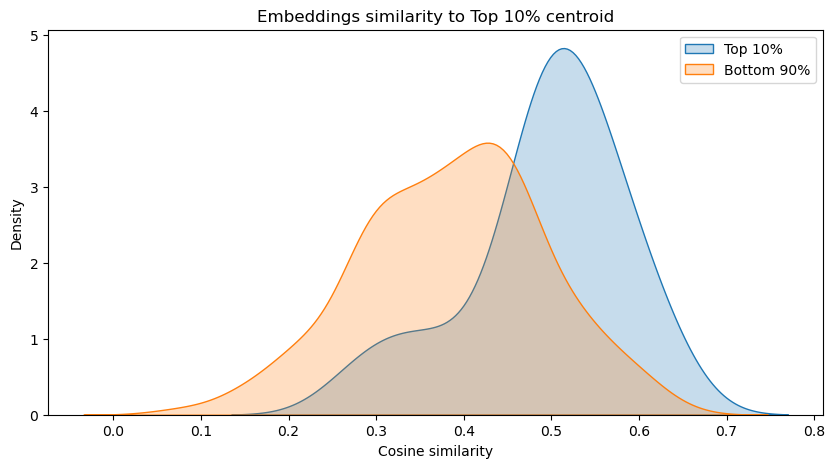

T-test length: 0.42268856854761355, p=0.6728203402010784
Mann-Whitney length: 4750.0, p=0.46066977407970655


In [29]:
from src.scripts.axis1 import visualize_caption_analysis, cluster_funny_captions

df_pop_culture = data_m.loc[data_m["aggregated_topic"] == "pop_culture"]

dict_result_unigrams_bigrams = visualize_caption_analysis(df_pop_culture, score_col="mean", text_col="caption", top_percent=0.1, ngram_range=(1,3))

Top 10% captions: 16, Bottom: 137
                 word       chi2         p
1233              now  10.503544  0.001191
1630           taking   9.015258  0.002677
1989  ve beaten death   9.015258  0.002677
1631        taking on   9.015258  0.002677
1632  taking on taxes   9.015258  0.002677
...               ...        ...       ...
37                all   0.000000  1.000000
38            all day   0.000000  1.000000
39          all night   0.000000  1.000000
40            all the   0.000000  1.000000
9     accountants are   0.000000  1.000000

[2282 rows x 3 columns]


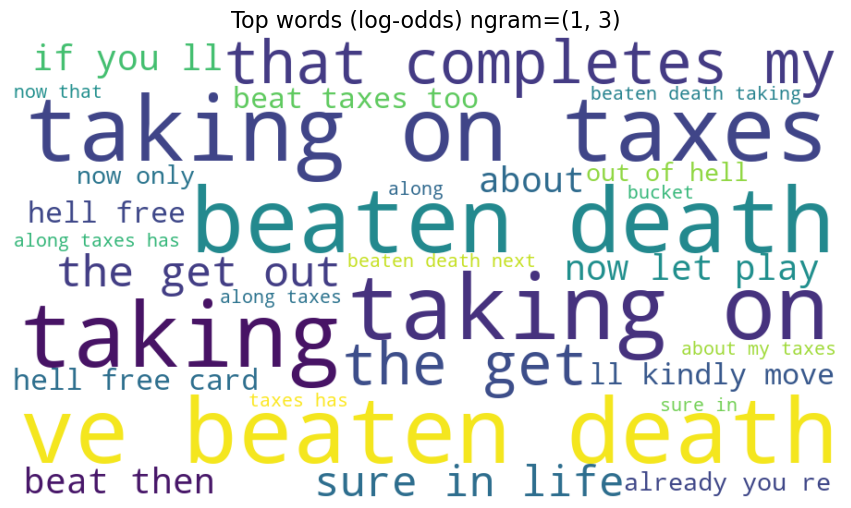

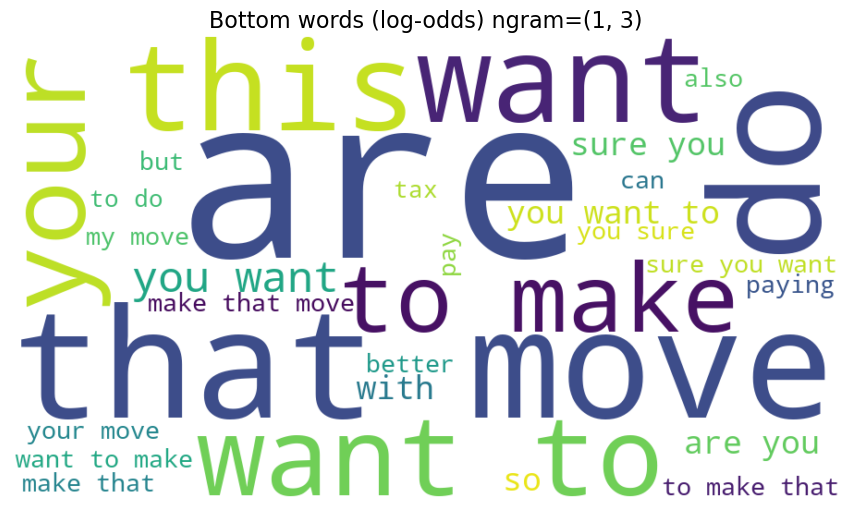

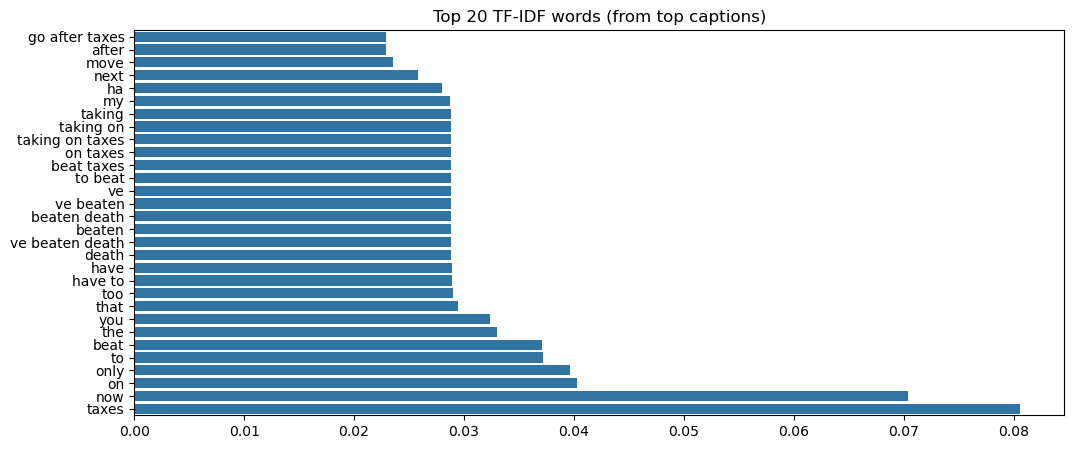

Batches: 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]


Mean sim (top): 0.6953459
Mean sim (bottom): 0.4456073
T-test similarity: 4.0426605731243175, p=8.396428886907169e-05


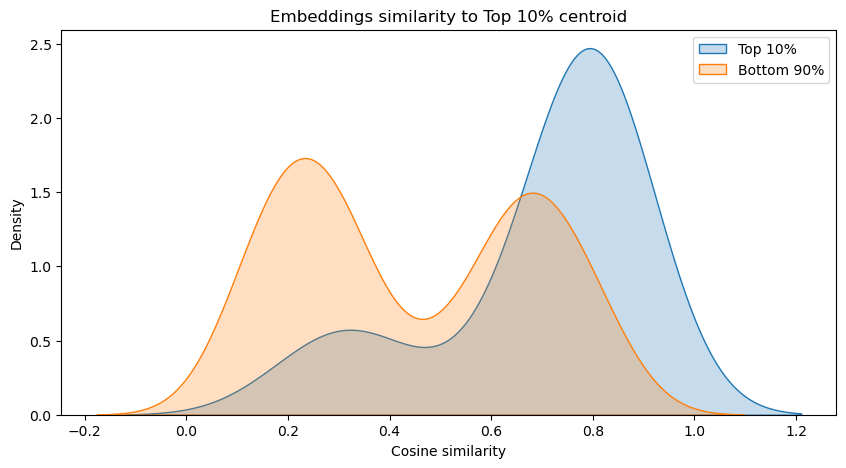

T-test length: -1.8241220751116598, p=0.07011058358337972
Mann-Whitney length: 782.5, p=0.06097298747367924


In [37]:
df_sub = data_m.loc[data_m["aggregated_topic"] == "time_endgame_clock"]

dict_result_unigrams_bigrams = visualize_caption_analysis(df_sub, score_col="mean", text_col="caption", top_percent=0.1, ngram_range=(1,3))

## 2.2. Axis 2 - How professions are laughed about


### Andras's sensational work

...

## 2.3. Axis 3 - Gender Roles and stereotypes


### Amélie's stunning work

...

# A big (thank you)² for this lecture !

# What is the answer to ADA, the universe and everything ?

In [9]:
import random

answer = None
number_of_tries = 0
while answer != 42:
    # Generate one random number
    answer = random.randint(0, 1_000_000)
    number_of_tries += 1

print("Number of TEEEEEENTATIVES:", number_of_tries, end="\r")
print("\nThe answer to ADA, the universe and everything is:", answer)


Number of TEEEEEENTATIVES: 421531
The answer to ADA, the universe and everything is: 42


# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>
# <center>THE END</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/606.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>